<a href="https://colab.research.google.com/github/hihunjin/brain_tumor_on_slices/blob/main/mrxs2tiff_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd

In [3]:
folder_df = pd.DataFrame()
folder_df['all'] = os.listdir("/content/gdrive/MyDrive/Brain_scan_image_3DHISTECH")
folder_df

,all
0,S15-12150.mrxs
1,S15-12185.mrxs
2,S15-36571.mrxs
3,S15-38426.mrxs
4,S15-38696.mrxs
...,...
310,S19-69638
311,S19-57139
312,S19-65572
313,S19-60008


In [ ]:
df = pd.DataFrame()
df = folder_df[folder_df['all'].str.endswith('mrxs')]
li = df['all'].tolist()
len(li)

158

In [ ]:
df2 = pd.DataFrame()
df2 = folder_df[~folder_df['all'].str.endswith('mrxs')]
li2 = df2['all'].tolist()
len(li2)

157

In [ ]:
for i in li:
    if i.split('.')[0] not in li2:
        print(i)

S17-46694.mrxs
S18-10073.mrxs


In [4]:
!pip install -U openslide-python
# !pip uninstall numpy;pip install numpy
!apt-get update -y
!apt install libvips-dev -y
!pip install gdcm

     |████████████████████████████████| 317kB 8.9MB/s 
  Created wheel for openslide-python: filename=openslide_python-1.1.2-cp37-cp37m-linux_x86_64.whl size=27676 sha256=7c78e280d1a7289d47a5e76a74adedf7651ee07c907185920fa06e871fa1ef22
  Stored in directory: /root/.cache/pip/wheels/6b/55/74/ba9d3dcc2c5c0f1282e08bae70df0ed57b496fb6b5c8f1adc9
Successfully built openslide-python
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/

# mrxs -> tiff

* 약 1분~20분 시간 걸림

In [ ]:
!vips openslideload /content/gdrive/MyDrive/Brain_scan_image_3DHISTECH/S15-42459.mrxs S15-42459.tiff --autocrop=true

/bin/bash: vips: command not found


In [ ]:
!vips openslideload /content/gdrive/MyDrive/Brain_scan_image_3DHISTECH/S15-42459.mrxs /content/gdrive/MyDrive/Brain_scan_image_3DHISTECH/S15-42459.tiff[tile,compression=lzw,bigtiff] --autocrop=true

# Tiff visualization

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

In [6]:
gdal.UseExceptions()

ds = gdal.Open("/content/gdrive/MyDrive/Brain_scan_image_3DHISTECH/S15-42459.tiff")

In [7]:
print(f"Driver: {ds.GetDriver().ShortName}/{ds.GetDriver().LongName}")
print(f"Size is {ds.RasterXSize} x {ds.RasterYSize} x {ds.RasterCount}")
print(f"Projection is {ds.GetProjection()}")
print('number of band : {}'.format(ds.RasterCount))

Driver: GTiff/GeoTIFF
Size is 85907 x 205013 x 4
Projection is 
number of band : 4


## Get array

* 30분 걸림

In [8]:
band = ds.GetRasterBand(1)
irrad = band.ReadAsArray()
# nrows, ncols = irrad.shape
# print(nrows, ncols)
# print(irrad.min(),irrad.max())

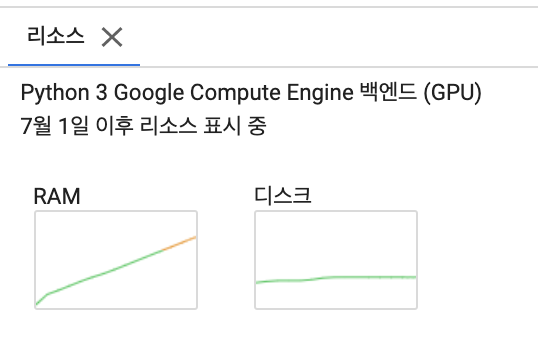

In [9]:
!top

=top - 15:14:44 up 42 min,  0 users,  load average: 0.57, 0.99, 1.00
Tasks:  14 total,   1 running,  13 sleeping,   0 stopped,   0 zombie
%Cpu(s): 17.3 us,  1.6 sy,  0.0 ni, 80.0 id,  0.9 wa,  0.0 hi,  0.3 si,  0.0 st
KiB Mem : 26698868 total,   349180 free, 19289852 used,  7059836 buff/cache
KiB Swap:        0 total,        0 free,        0 used.  7029856 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND   
      1 root      20   0  342120  51764  32280 S   0.0  0.2   0:02.91 node      
     19 root      20   0   35892   4764   3652 S   0.0  0.0   0:00.60 tail      
     65 root      20   0  194924  60068  13264 S   0.0  0.2   0:03.00 jupyter-+ 
     66 root      20   0  710380  10984   4672 S   0.0  0.0   0:04.73 dap_mult+ 
     78 root      20   0 19.065g 0.017t  58160 S   0.0 70.2  27:54.16 python3   
    100 root      20   0  129176  16592   5452 S   0.0  0.1   0:07.21 python3   
    135 root      20   0   18380   1556   1256 S   0.0  0.0  

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
# a=3000
# b=7000
# 85907 x 205013
ax.imshow(irrad[:,55013:155013], cmap="gray")
# 130000:140000,30000:40000
# ax.imshow(irrad, cmap="gray")
ax.set_aspect("equal", "box")
plt.show()
